In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
plt.rc("font",size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
%matplotlib inline

In [48]:
dataset=pd.read_csv("C:\\Users\\Rebecca\\Documents\\TL Study Docs\\ML\\Dataset\\Marketing_campaign.csv")

print(list(dataset.columns))

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [49]:
dataset.shape

(41188, 21)

In [50]:
dataset=dataset.dropna()

In [52]:
dataset.shape

(41188, 21)

In [53]:
dataset.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0


In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [55]:
dataset.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp_var_rate      False
cons_price_idx    False
cons_conf_idx     False
euribor3m         False
nr_employed       False
y                 False
dtype: bool

In [56]:
dataset.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [57]:
dataset.corr()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp_var_rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons_price_idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons_conf_idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr_employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


In [58]:
dataset['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [60]:
dataset['education']=np.where(dataset['education']=='basic.6y','Basic',dataset['education'])

In [61]:
dataset['education']=np.where(dataset['education']=='basic.9y','Basic',dataset['education'])
dataset['education']=np.where(dataset['education']=='basic.4y','Basic',dataset['education'])

In [62]:
dataset['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [63]:
dataset['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [10]:
dataset['age'].value_counts()

31    1947
32    1846
33    1833
36    1780
35    1759
34    1745
30    1714
37    1475
29    1453
39    1432
38    1407
41    1278
40    1161
42    1142
45    1103
43    1055
46    1030
44    1011
28    1001
48     979
47     928
50     875
27     851
49     839
52     779
51     754
53     733
56     704
26     698
54     684
      ... 
65      44
19      42
76      34
69      34
72      34
73      34
68      33
74      32
80      31
18      28
78      27
67      26
75      24
88      22
77      20
81      20
82      17
83      17
85      15
79      14
86       8
84       7
17       5
92       4
98       2
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64

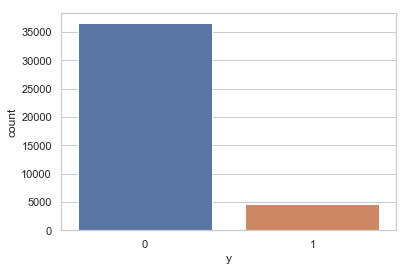

<Figure size 432x288 with 0 Axes>

In [64]:
sns.countplot(x='y',data=dataset)
plt.show()
plt.savefig('count_plot')

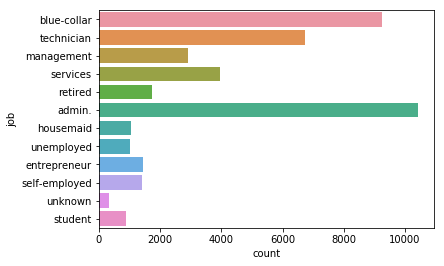

In [11]:
sns.countplot(y='job',data=dataset)

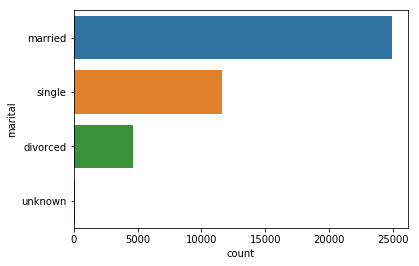

In [12]:
sns.countplot(y='marital',data=dataset)

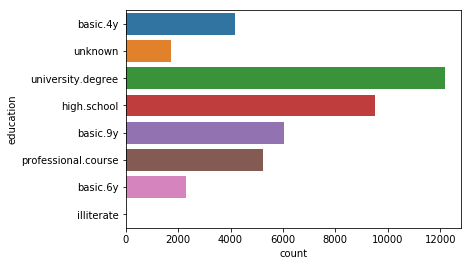

In [13]:
sns.countplot(y='education',data=dataset)

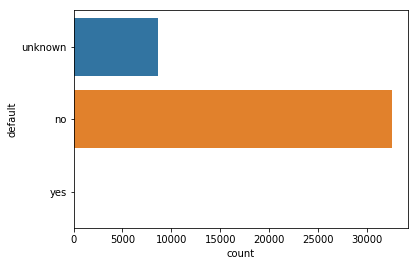

In [14]:
sns.countplot(y='default',data=dataset)

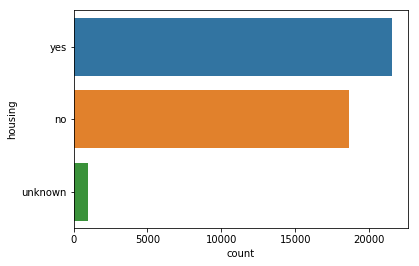

In [15]:
sns.countplot(y='housing',data=dataset)

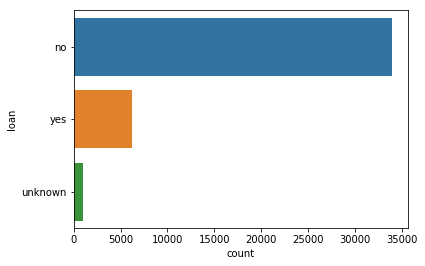

In [16]:
sns.countplot(y='loan',data=dataset)

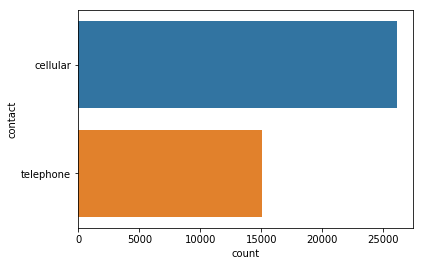

In [17]:
sns.countplot(y='contact',data=dataset)

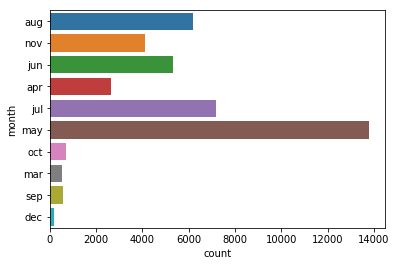

In [18]:
sns.countplot(y='month',data=dataset)

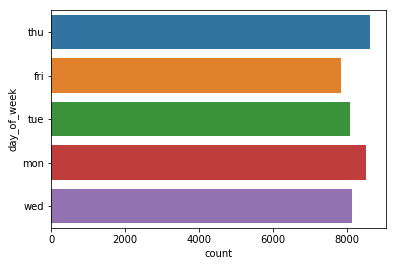

In [19]:
sns.countplot(y='day_of_week',data=dataset)

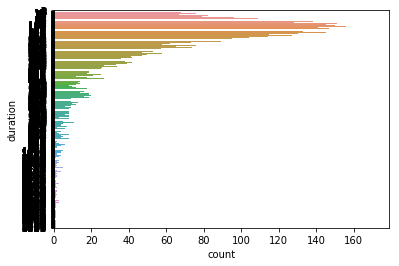

In [20]:
sns.countplot(y='duration',data=dataset)

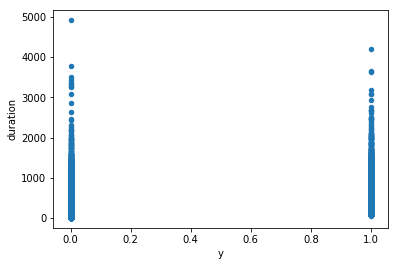

In [22]:
dataset.plot(x='y',y='duration',kind='scatter')

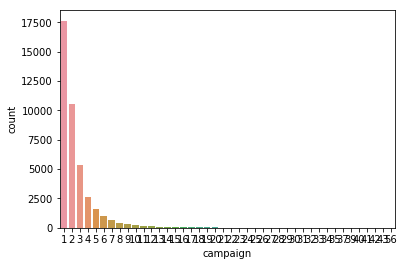

In [26]:
sns.countplot(x='campaign',data=dataset)

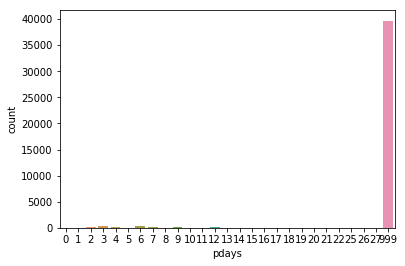

In [27]:
sns.countplot(x='pdays',data=dataset)

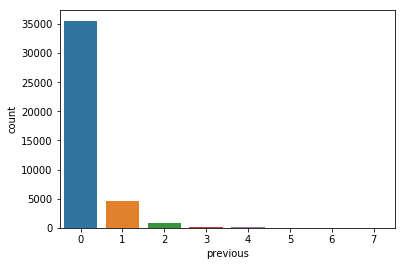

In [28]:
sns.countplot(x='previous',data=dataset)

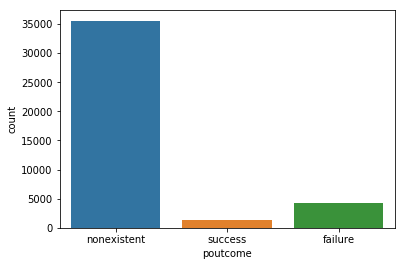

In [29]:
sns.countplot(x='poutcomesns.countplot(x='pdays',data=dataset)',data=dataset)

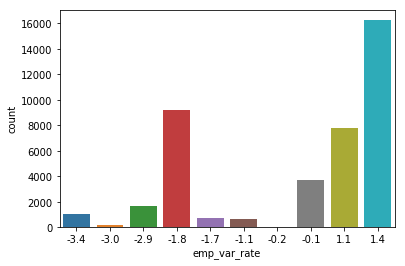

In [30]:
sns.countplot(x='emp_var_rate',data=dataset)

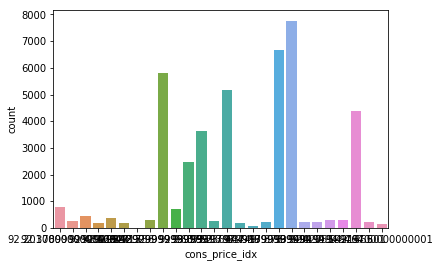

In [31]:
sns.countplot(x='cons_price_idx',data=dataset)

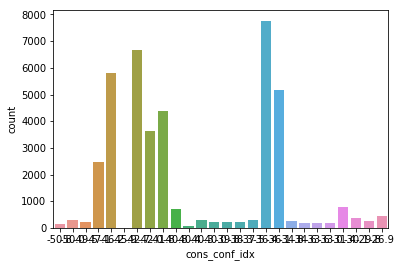

In [35]:
sns.countplot(x='cons_conf_idx',data=dataset)

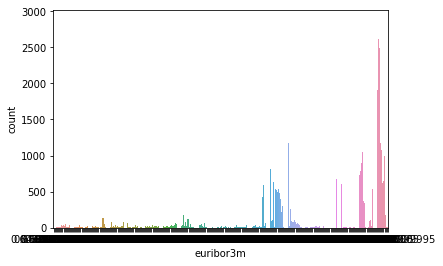

In [36]:
sns.countplot(x='euribor3m',data=dataset)

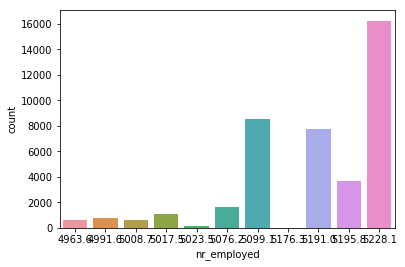

In [37]:
sns.countplot(x='nr_employed',data=dataset)

In [39]:
dataset.columns[[12, 16, 18]]

Index(['pdays', 'cons_price_idx', 'euribor3m'], dtype='object')

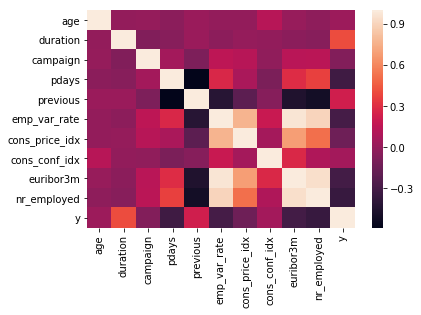

In [40]:
sns.heatmap(dataset.corr())

In [43]:
dataset2=dataset

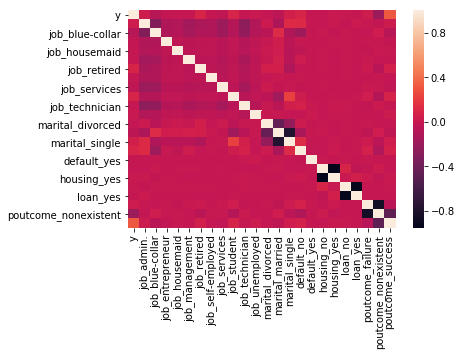

In [42]:
dataset2.drop(dataset2.columns[[0, 3, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]], axis=1, inplace=True)
dataset3 = pd.get_dummies(dataset2, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])
dataset3.drop(dataset3.columns[[12, 16, 18, 21, 24]], axis=1, inplace=True)
dataset3.columns
sns.heatmap(dataset3.corr())
plt.show()

In [65]:
dataset.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [66]:
dataset.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [67]:
dataset.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [68]:
dataset.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


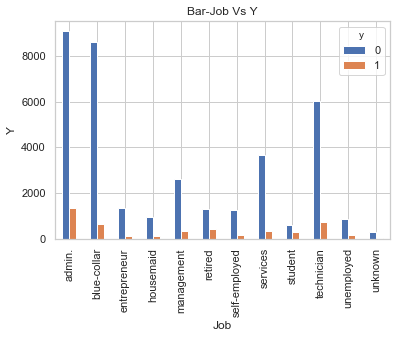

In [71]:
pd.crosstab(dataset.job,dataset.y).plot(kind='bar')
plt.title("Bar-Job Vs Y")
plt.xlabel('Job')
plt.ylabel('Y')
plt.savefig("Bar Job Vs Y")

In [ ]:
pd.crosstab(dataset.job,dataset.y).plot(kind='bar')
plt.title("Bar-Job Vs Y")
plt.xlabel('Job')
plt.ylabel('Y')
plt.savefig("Bar Job Vs Y")

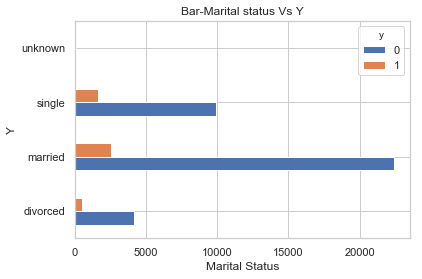

In [72]:
pd.crosstab(dataset.marital,dataset.y).plot(kind='barh')
plt.title("Bar-Marital status Vs Y")
plt.xlabel('Marital Status')
plt.ylabel('Y')
plt.savefig("Bar Marital Vs Y")

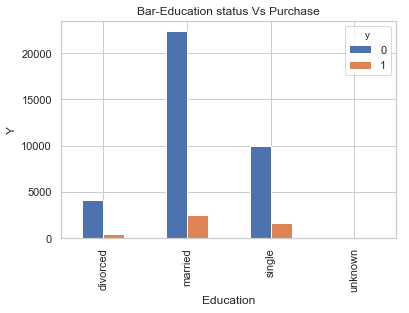

In [73]:
pd.crosstab(dataset.marital,dataset.y).plot(kind='bar')
plt.title("Bar-Education status Vs Purchase")
plt.xlabel('Education')
plt.ylabel('Y')
plt.savefig("Education Marital Vs Y")

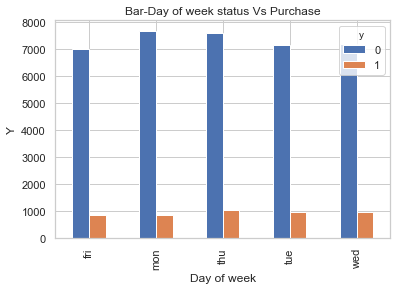

In [74]:
pd.crosstab(dataset.day_of_week,dataset.y).plot(kind='bar')
plt.title("Bar-Day of week status Vs Purchase")
plt.xlabel('Day of week')
plt.ylabel('Y')
plt.savefig("Education Day of week Vs Y")

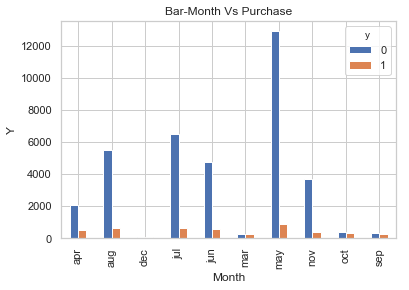

In [75]:
pd.crosstab(dataset.month,dataset.y).plot(kind='bar')
plt.title("Bar-Month Vs Purchase")
plt.xlabel('Month')
plt.ylabel('Y')
plt.savefig("Month Marital Vs Y")

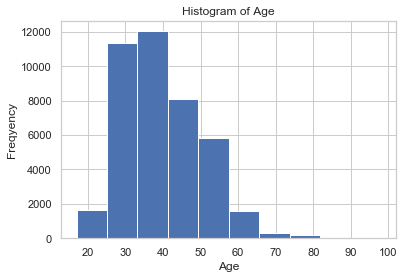

In [79]:
dataset.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Freqyency')
plt.savefig('hist_age')

In [76]:
dataset.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [82]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

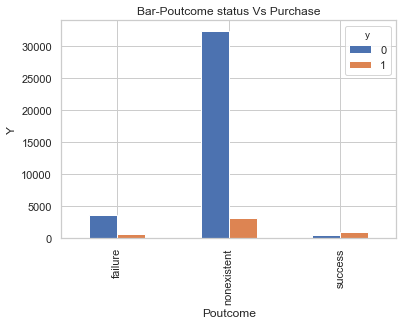

In [80]:
pd.crosstab(dataset.poutcome,dataset.y).plot(kind='bar')
plt.title("Bar-Poutcome status Vs Purchase")
plt.xlabel('Poutcome')
plt.ylabel('Y')
plt.savefig("Poutcome Vs Y")

In [87]:
datasetCopy=dataset.copy()

In [89]:
datasetCopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [90]:
objectVariable=['job','education','default']

In [97]:
def dummy_list(df,to_dummylist):
    for dummy in to_dummylist:
        dummies=pd.get_dummies(df[dummy],prefix='dummy_'+dummy,dummy_na=False)
        df=df.drop(dummy,1)
        df=pd.concat([df,dummies],axis=1)
    return df

In [108]:
f

In [109]:
dataDummy.head(1)

,age,marital,housing,loan,contact,month,day_of_week,duration,campaign,pdays,...,dummyjob_unknown,dummyeducation_Basic,dummyeducation_high.school,dummyeducation_illiterate,dummyeducation_professional.course,dummyeducation_university.degree,dummyeducation_unknown,dummydefault_no,dummydefault_unknown,dummydefault_yes
0,44,married,yes,no,cellular,aug,thu,210,1,999,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
dataDummy.drop('job',1,inplace=True)
dataDummy.drop('education',1,inplace=True)
dataDummy.drop('default',1,inplace=True)

In [112]:
dataDummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 39 columns):
age                                   41188 non-null int64
marital                               41188 non-null object
housing                               41188 non-null object
loan                                  41188 non-null object
contact                               41188 non-null object
month                                 41188 non-null object
day_of_week                           41188 non-null object
duration                              41188 non-null int64
campaign                              41188 non-null int64
pdays                                 41188 non-null int64
previous                              41188 non-null int64
poutcome                              41188 non-null object
emp_var_rate                          41188 non-null float64
cons_price_idx                        41188 non-null float64
cons_conf_idx                         41188 non-null f

In [116]:
data=dataset.copy()
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list=pd.get_dummies(data[var],prefix=var)
    data1=data.join(cat_list)
    data=data1

In [117]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [119]:
data_final=data[to_keep]
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 62 columns):
age                              41188 non-null int64
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
emp_var_rate                     41188 non-null float64
cons_price_idx                   41188 non-null float64
cons_conf_idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr_employed                      41188 non-null float64
y                                41188 non-null int64
job_admin.                       41188 non-null uint8
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired      

In [120]:
y=['y']
X=[i for i in data_final if i not in y]

In [124]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

logreg=LogisticRegression()




[False False False False  True False False False  True False False  True
 False False False  True False  True  True False False False False False
 False False False False False False False False  True False False False
 False False False False False False  True  True  True False False False
  True  True  True False False False  True False False  True  True  True
  True]
[35 33 12 40  1 13 17 16  1 27 11  1 24 39 42  1 31  1  1 19 21 41  2  3
  4 43  6  7 38  8 10 15  1 14 44 36 29 37 20 30 28 23  1  1  1 18 22 25
  1  1  1 32  5  9  1 34 26  1  1  1  1]


In [125]:
columnsList=rfe.ranking_

In [138]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 62 columns):
age                              41188 non-null int64
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
emp_var_rate                     41188 non-null float64
cons_price_idx                   41188 non-null float64
cons_conf_idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr_employed                      41188 non-null float64
y                                41188 non-null int64
job_admin.                       41188 non-null uint8
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired      

In [134]:
columnsList.size

61

In [140]:
colPos=0
col=0
#df.drop(df.columns[cols],axis=1,inplace=True)
newData=data_final.copy()
for i in columnsList:
    #print(colPos)
    if i!=1:
        newData.drop(data_final.columns[colPos],axis=1,inplace=True)
        #col=col+1
    colPos=colPos+1

In [141]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 19 columns):
previous                41188 non-null int64
euribor3m               41188 non-null float64
job_admin.              41188 non-null uint8
job_management          41188 non-null uint8
job_self-employed       41188 non-null uint8
job_services            41188 non-null uint8
education_unknown       41188 non-null uint8
contact_cellular        41188 non-null uint8
contact_telephone       41188 non-null uint8
month_apr               41188 non-null uint8
month_jun               41188 non-null uint8
month_mar               41188 non-null uint8
month_may               41188 non-null uint8
day_of_week_fri         41188 non-null uint8
day_of_week_tue         41188 non-null uint8
day_of_week_wed         41188 non-null uint8
poutcome_failure        41188 non-null uint8
poutcome_nonexistent    41188 non-null uint8
poutcome_success        41188 non-null uint8
dtypes: float64(1), int64(1), uint

In [123]:
data_final.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
      

In [147]:
X=data_final[['previous','euribor3m','job_blue-collar','job_retired','job_services','job_student','default_no','month_nov','month_oct','month_sep','day_of_week_fri',
              'day_of_week_wed','poutcome_success','poutcome_nonexistent','poutcome_failure']]
X=newData.copy()
y=data_final['y']

In [148]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.282830
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41170
Method:                           MLE   Df Model:                           17
Date:                Sun, 05 May 2019   Pseudo R-squ.:                  0.1966
Time:                        11:53:19   Log-Likelihood:                -11649.
converged:                       True   LL-Null:                       -14499.
                                        LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
previous                 0.2187      0.051      4.289      0.000       0.119       0.319

In [ ]:
[35 33 12 40  1 13 17 16  1 27 11  1 24 39 42  1 31  1  1 19 21 41  2  3
  4 43  6  7 38  8 10 15  1 14 44 36 29 37 20 30 28 23  1  1  1 18 22 25
  1  1  1 32  5  9  1 34 26  1  1  1  1]

In [150]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [151]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [152]:
y_pred=logreg.predict(X_test)

In [158]:
print('Accuracy')
print(format(logreg.score(X_test,y_test)))

Accuracy
0.9019988670389253


## Cross Validation

In [161]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kFold=model_selection.KFold(n_splits=10,random_state=7)
modelCV=LogisticRegression()
scoring='accuracy'
results=model_selection.cross_val_score(modelCV,X_train,y_train,cv=kFold,scoring=scoring)
print(results.mean())

0.8975061734987682


## Confusion Matrix

In [162]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[10898   108]
 [ 1103   248]]


In [ ]:
print('Accuracy')
print(format())

In [163]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     11006
           1       0.70      0.18      0.29      1351

   micro avg       0.90      0.90      0.90     12357
   macro avg       0.80      0.59      0.62     12357
weighted avg       0.88      0.90      0.88     12357

